In [2]:
#Importar librerias

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
#Para empezar, carguemos los datos de los dígitos usando las herramientas de datos de Scikit-Learn

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
#A continuación, tracemos los primeros 100 de estos para recordar exactamente lo que estamos viendo

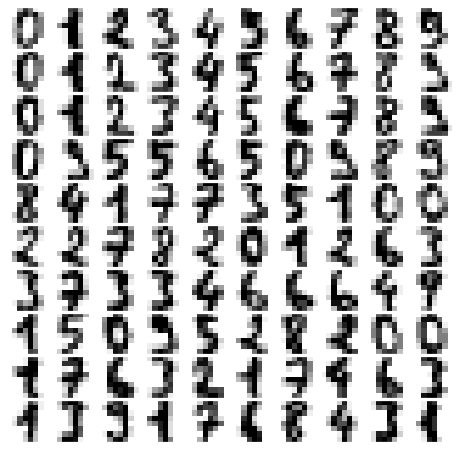

In [4]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [ ]:
#Tenemos casi 1800 dígitos en 64 dimensiones, y podemos construir un GMM encima de estos para generar más. Los GMM pueden tener dificultades para converger en un espacio dimensional tan alto, por lo que comenzaremos con un algoritmo de reducción de dimensionalidad invertible en los datos. Aquí usaremos un PCA sencillo, pidiéndole que conserve el 99 % de la varianza en los datos proyectados

In [5]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

In [ ]:
#El resultado son 41 dimensiones, una reducción de casi 1/3 casi sin pérdida de información. Dados estos datos proyectados, usemos el AIC para obtener un indicador de la cantidad de componentes GMM que debemos usar

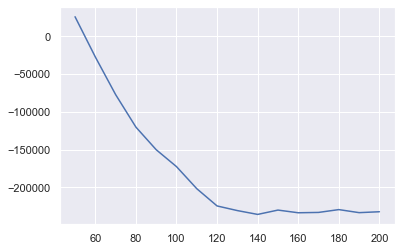

In [7]:
from sklearn.mixture import GaussianMixture as GMM
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [ ]:
#Parece que alrededor de 110 componentes minimiza el AIC; Usaremos este modelo. Ajustemos rápidamente esto a los datos y confirmemos que ha convergido

In [8]:
gmm = GMM(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [ ]:
#Ahora podemos dibujar muestras de 100 puntos nuevos dentro de este espacio proyectado de 41 dimensiones, usando el GMM como modelo generativo

In [12]:
gmm = GMM(140,covariance_type='full',random_state=0)
gmm.fit(data)
data_new = gmm.sample(100)

In [ ]:
#Finalmente, podemos usar la transformada inversa del objeto PCA para construir los nuevos dígitos

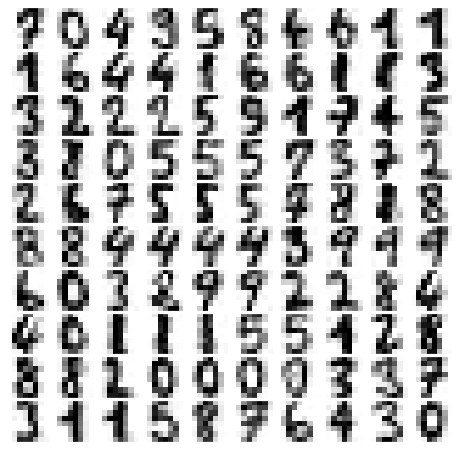

In [13]:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

In [ ]:
#Los resultados en su mayor parte parecen dígitos plausibles del conjunto de datos

In [ ]:
#CONCLUSION : Este modelo generativo de dígitos puede resultar muy útil como componente de un clasificador generativo bayesiano, como veremos en la siguiente sección